In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings

# **Importing Dataset**

In [ ]:
# ignore this if running on Jupyter
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
import io

# change to file path when running on Jupyter
df_train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df_test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

In [ ]:
print(df_train.shape)
print(df_test.shape)
df_train.head(n = 10)

(7352, 563)
(2947, 563)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0

In [ ]:
df_test.head(n = 10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,-0.554577,-0.466223,0.717208,0.635502,0.789497,-0.877764,-0.997766,-0.998414,-0.934345,-0.975669,-0.949824,-0.830478,-0.168084,-0.378996,0.246217,0.521204,-0.487793,0.482280,-0.045462,0.211955,-0.134894,0.130858,-0.014176,-0.105971,0.073544,-0.171516,0.040063,0.076989,-0.490546,-0.709003,...,-0.484619,-1.000000,-0.035356,-0.254248,-0.700326,-0.770610,-0.797113,-0.764485,-0.820188,-0.937959,-0.770610,-0.970958,-0.798387,0.179435,-1.000000,-0.047391,-0.467849,-0.761326,-0.890165,-0.907308,-0.895301,-0.917883,-0.909829,-0.890165,-0.994105,-0.898022,-0.234815,-1.000000,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,-0.554577,-0.806013,0.768031,0.683698,0.796706,-0.969097,-0.999580,-0.999646,-0.997720,-0.994006,-0.973637,-0.950720,-0.302437,-0.348243,-0.404785,0.507492,-0.156495,0.040674,0.272991,0.197566,-0.194556,0.411411,-0.340466,0.077555,-0.084024,0.035305,-0.010083,-0.104983,-0.429134,0.399177,...,-0.723642,-1.000000,-0.491213,-0.215404,-0.666004,-0.924461,-0.916774,-0.919383,-0.917983,-0.991121,-0.924461,-0.995727,-0.933127,-0.218860,-1.000000,-0.031474,-0.090655,-0.461801,-0.951977,-0.938212,-0.938008,-0.949922,-0.986902,-0.951977,-0.998272,-0.951255,-0.431053,-1.000000,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,-0.568512,-0.799116,0.848305,0.667864,0.822442,-0.976782,-0.999954,-0.999570,-0.998720,-0.993456,-0.974266,-0.964976,-0.617916,-0.695490,-0.536693,0.242147,-0.114997,0.032703,0.192385,-0.011945,-0.063363,0.470819,-0.507395,0.188536,-0.231575,0.632120,-0.550708,0.305653,-0.323848,0.279786,...,-0.898000,-1.000000,0.140729,-0.206062,-0.639809,-0.975209,-0.973998,-0.967097,-0.982849,-0.997663,-0.975209,-0.999504,-0.9682

# **Dataset Cleaning and Checking**

In [ ]:
df_train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,-0.306043,-0.557121,0.523551,0.387386,0.594374,-0.547569,-0.820041,-0.901874,-0.845784,-0.684345,-0.643770,-0.631069,-0.102993,-0.137937,-0.163946,-0.116599,0.102762,-0.037786,0.130477,-0.026229,0.026322,0.159966,-0.019575,0.009420,0.033291,0.036587,-0.078640,-0.125131,-0.193802,0.105005,...,-0.678618,-0.347657,-0.877995,0.178195,-0.312968,-0.615441,-0.693210,-0.692876,-0.674830,-0.726645,-0.885103,-0.693210,-0.874292,-0.719795,-0.087878,-0.889442,-0.046516,-0.253649,-0.565425,-0.779376,-0.792391,-0.772836,-0.811409,-0.871927,-0.779376,-0.935785,-0.771497,-0.284627,-0.898859,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,0.282243,0.293867,0.363594,0.343611,0.297818,0.471808,0.259607,0.126333,0.221983,0.371608,0.371581,0.386569,0.468959,0.437268,0.371363,0.306507,0.246593,0.243635,0.230067,0.257383,0.215001,0.208837,0.221432,0.

No outliers, as the values are squeezed between -1 and 1 (min and max)

In [ ]:
# check for duplicate values
print("Duplicated rows in training set: {} \n" .format(sum(df_train.duplicated())))
print("Duplicated rows in test set: {} \n" .format(sum(df_test.duplicated())))

Duplicated rows in training set: 0 

Duplicated rows in test set: 0 



In [ ]:
# check for null values
print("Nulls in  in training set: {} \n" .format(df_train.isnull().values.sum()))
print("Nulls in  in test set: {} \n" .format(df_test.isnull().values.sum()))

Nulls in  in training set: 0 

Nulls in  in test set: 0 



In [ ]:
# check for NaN values
print("NaN in  in training set: {} \n" .format(df_train.isna().values.sum()))
print("NaN in  in test set: {} \n" .format(df_test.isna().values.sum()))

NaN in  in training set: 0 

NaN in  in test set: 0 



No data cleaning is needed, as there are no null or NaN values in this dataset.



Below, we can change the column names for simplificationn

In [ ]:
columnsTrain = df_train.columns # or test is fine

columnsTrain = columnsTrain.str.replace('[()]', '') # Python in-built str to replace chars
columnsTrain = columnsTrain.str.replace('[-]', '')
columnsTrain = columnsTrain.str.replace('[,]', '')

df_train.columns = columnsTrain
df_test.columns = columnsTrain

df_train.head(n = 10)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,tBodyAccminZ,tBodyAccsma,tBodyAccenergyX,tBodyAccenergyY,tBodyAccenergyZ,tBodyAcciqrX,tBodyAcciqrY,tBodyAcciqrZ,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX1,tBodyAccarCoeffX2,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY2,tBodyAccarCoeffY3,tBodyAccarCoeffY4,tBodyAccarCoeffZ1,tBodyAccarCoeffZ2,tBodyAccarCoeffZ3,tBodyAccarCoeffZ4,tBodyAcccorrelationXY,tBodyAcccorrelationXZ,tBodyAcccorrelationYZ,...,fBodyBodyAccJerkMagentropy,fBodyBodyAccJerkMagmaxInds,fBodyBodyAccJerkMagmeanFreq,fBodyBodyAccJerkMagskewness,fBodyBodyAccJerkMagkurtosis,fBodyBodyGyroMagmean,fBodyBodyGyroMagstd,fBodyBodyGyroMagmad,fBodyBodyGyroMagmax,fBodyBodyGyroMagmin,fBodyBodyGyroMagsma,fBodyBodyGyroMagenergy,fBodyBodyGyroMagiqr,fBodyBodyGyroMagentropy,fBodyBodyGyroMagmaxInds,fBodyBodyGyroMagmeanFreq,fBodyBodyGyroMagskewness,fBodyBodyGyroMagkurtosis,fBodyBodyGyroJerkMagmean,fBodyBodyGyroJerkMagstd,fBodyBodyGyroJerkMagmad,fBodyBodyGyroJerkMagmax,fBodyBodyGyroJerkMagmin,fBodyBodyGyroJerkMagsma,fBodyBodyGyroJerkMagenergy,fBodyBodyGyroJerkMagiqr,fBodyBodyGyroJerkMagentropy,fBodyBodyGyroJerkMagmaxInds,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0.794872,-0.212728,-0.535352,-0.871914,-0.995031,-0.995127,-0.994640,-0.996060,-0.995866,-0.995031,-0.999973,-0.993755,-1.000000,-0.555556,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0

# **Data Visualization and Exploration**

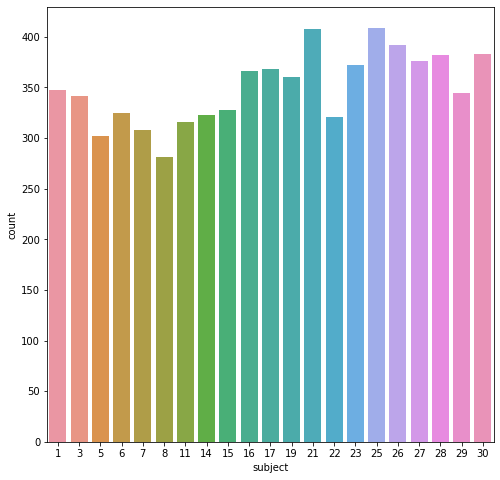

In [ ]:
plt.figure(figsize = (8,8))
sns.countplot(x='subject', data = df_train)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

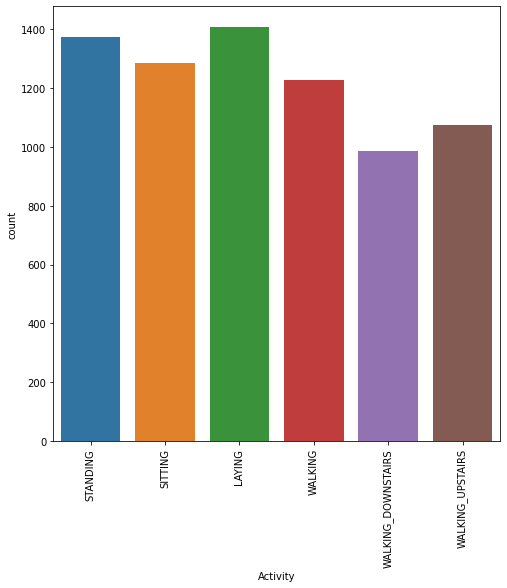

In [ ]:
plt.figure(figsize = (8,8))
sns.countplot(x='Activity', data = df_train)
plt.xticks(rotation = 90)

The two graphs above shows the countplot for categorical variables. It is observed that the distributions for each category are roughly equal, so there is no huge gap among the number of data for each categories.

We can check a more advanced countplot below that combines the information from the above two plots.

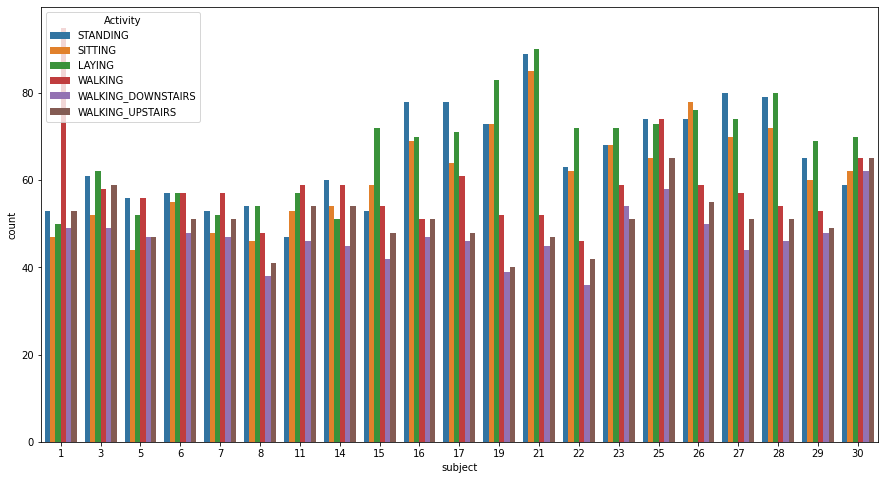

In [ ]:
plt.figure(figsize = (15, 8))
sns.countplot(x='subject', hue='Activity', data = df_train)

In addition, we can verify that there is no huge gap in the number data of each activities by checking class imbalance.

In [ ]:
df_train['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

Indeed, each of the classes have close enough values, so class imbalance isn't a problem here.

We can also plot Kernel Density Plot to visualize the probability distributions as smoothed density curves for each of the features.
For simplicity, only selected features are plotted. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


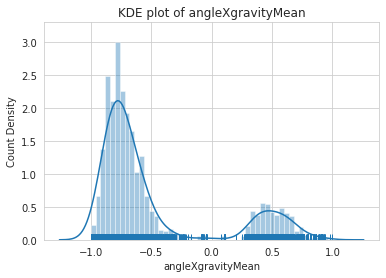

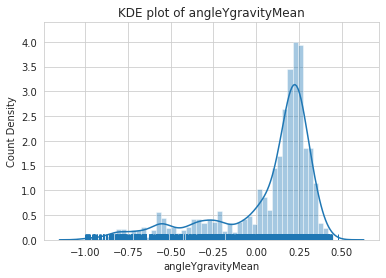

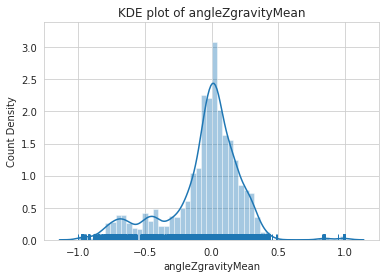

In [ ]:
def plot_density(data, features, bins = 50, hist = True):
  for feature in features:
    sns.set_style("whitegrid")
    sns.distplot(data[feature], bins = bins, rug = True, hist = hist)
    plt.title("KDE plot of " + feature)
    plt.xlabel(feature)
    plt.ylabel('Count Density')
    
    warnings.filterwarnings('ignore')
    plt.show()

sample_features_1 = ['angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean']
plot_density(df_train, sample_features_1)


In order to show relationships between categorical and numerical variables, we can show the distributions via Box Plots and Violine Plots.

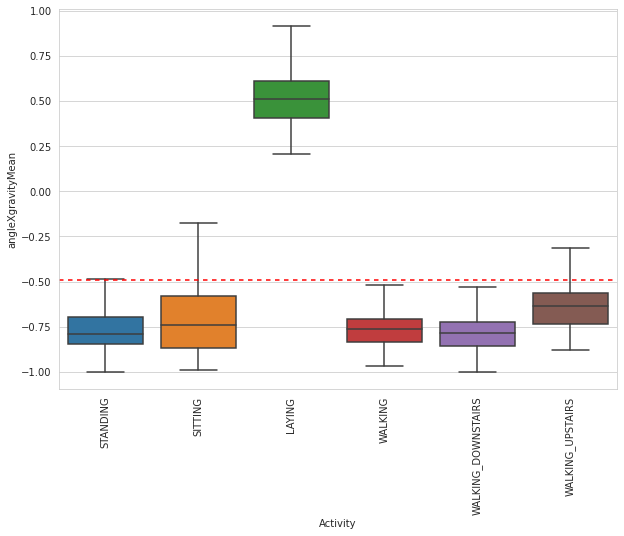

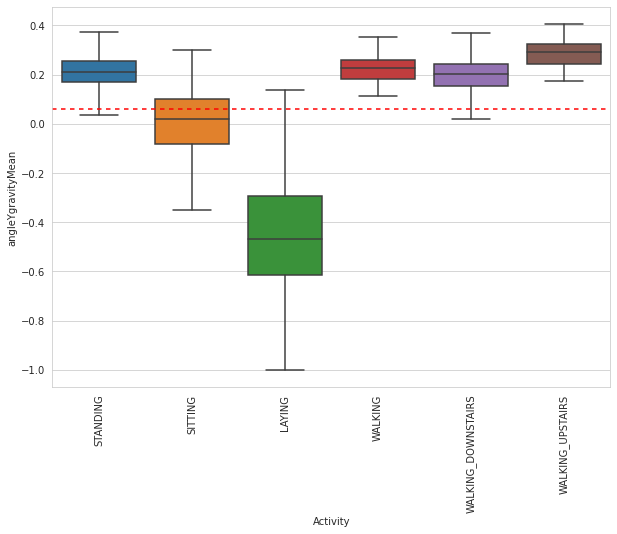

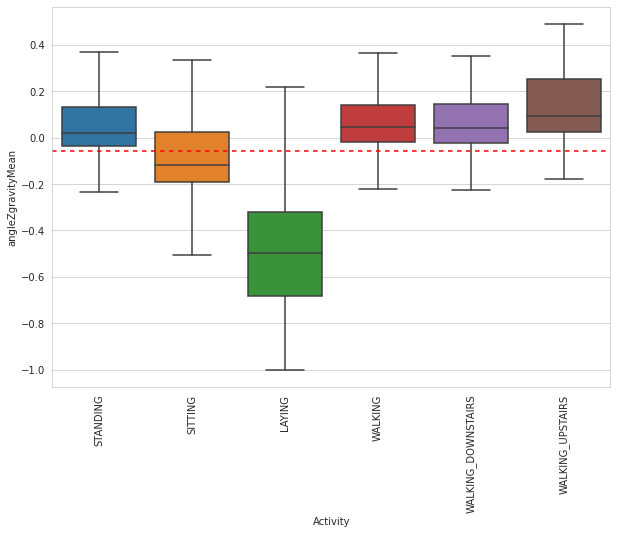

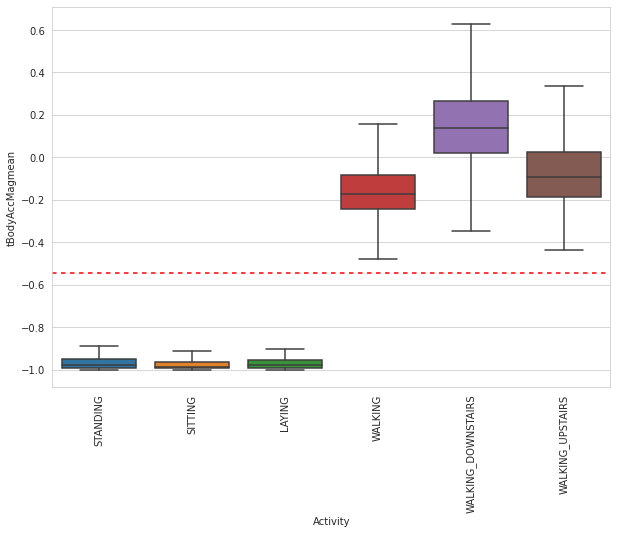

In [ ]:
def plot_box(data, features, x = 'Activity'):
  for feature in features: 
    plt.figure(figsize = (10, 7))
    sns.set_style("whitegrid")
    sns.boxplot(x = x, data = df_train, y = data[feature], showfliers = False)
    plt.axhline(y = np.mean(data[feature]), dashes = (3,3), color = 'red')
    plt.xlabel('Activity')
    plt.ylabel(feature)
    plt.xticks(rotation = 90)
    plt.show()

sample_features_1.append('tBodyAccMagmean')
plot_box(df_train, sample_features_1)

As shown, the features shown for the activity "Laying" seems to have data points that are far away from the mean of the features (shown in red dash). We can almost be certain that if angleXgravityMean is greater than or equal to 0, then the activity is "Laying". Some of the values in angleYgravityMean boxplot does not lead to the assumption that if  angleYgravityMean is below some certain value, then it must be a "Laying" activity. This observation also  applies to angleZgravityMean, as some portion of the values in angleZgravityMean for "Laying" overlaps with "Sitting".

All of the data values in the last three activities for the last boxplot are greater than the mean. In addition, we can also conclude from the last boxplot that when tBodyAccMagmean is greater than -0.5, then the activity is most likely to be "active" (Walking, Walking upstairs, Walking downstairs). When tBodyAccMagmean is less than -0.8, we can be certain that the activity is "static" (Standing, Sitting,  Laying).

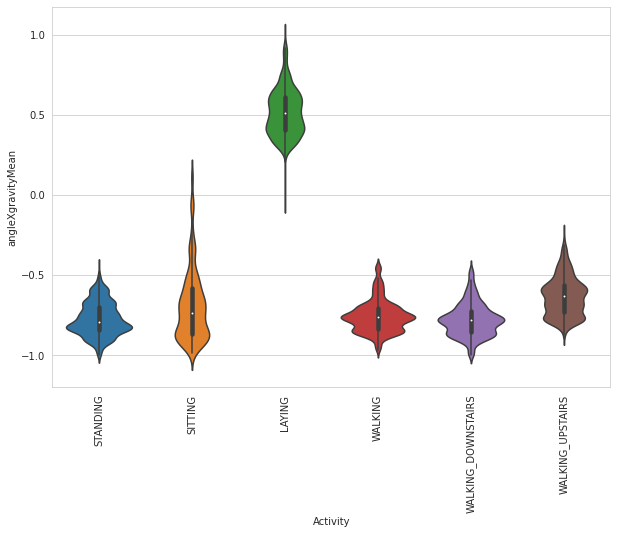

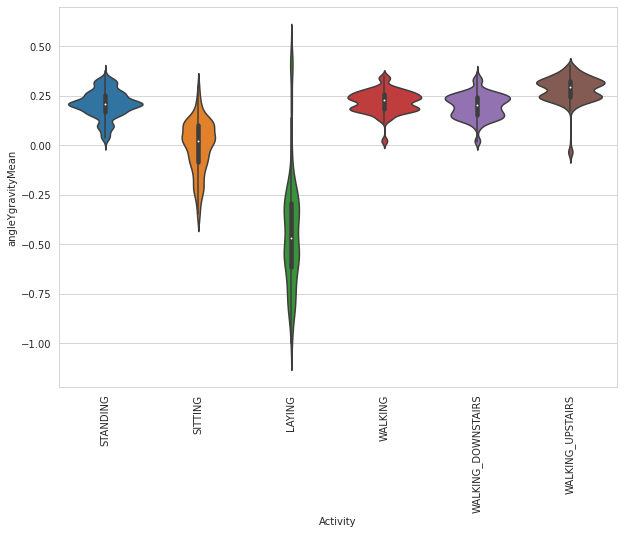

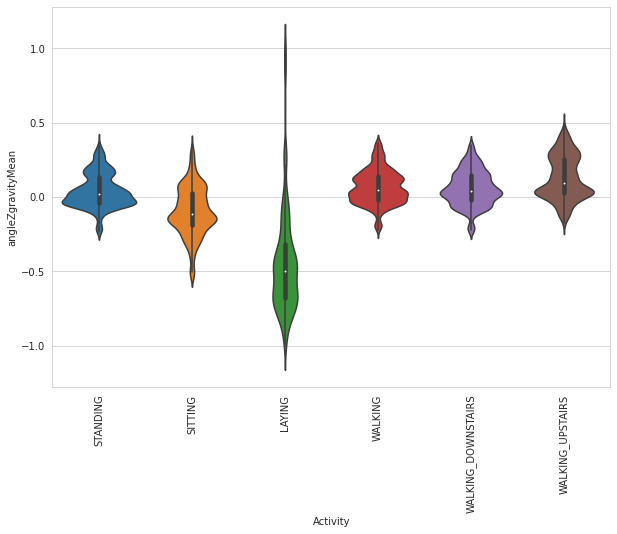

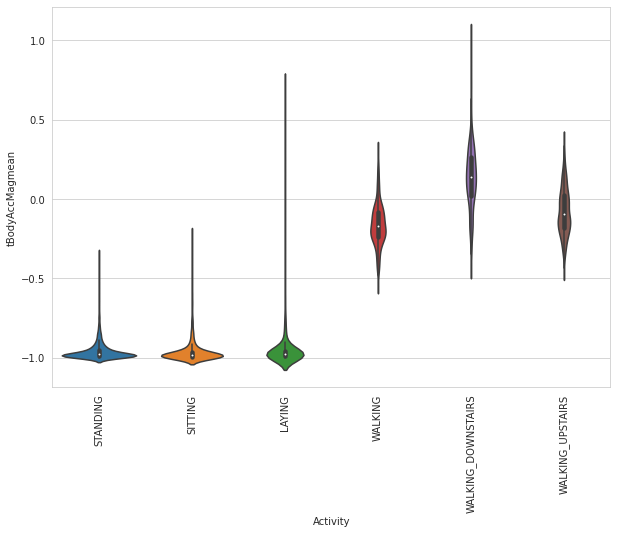

In [ ]:
def plot_violin(data, features, x = 'Activity'):
  for feature in features:
    plt.figure(figsize = (10, 7))
    sns.set_style("whitegrid")
    sns.violinplot(x = x, data = df_train, y = data[feature])
    plt.xlabel('Activity')
    plt.ylabel(feature)
    plt.xticks(rotation = 90)
    plt.show()

plot_violin(df_train, sample_features_1)

In below, we can reduce the dimensionality of the training dataset by PCA. 

In [ ]:
# PCA Dimensionality Reduction
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

matrix_for_reduction = df_train.drop(['subject', 'Activity'], axis = 1)

scaler = StandardScaler()
scaler.fit_transform(matrix_for_reduction)

# model_pca = PCA(n_components = None)
model_pca = PCA(n_components = 50)
components = model_pca.fit_transform(matrix_for_reduction)

total_var = model_pca.explained_variance_ratio_.sum() * 100

figure = px.scatter(components, x = 0, y = 1, title=f'Total Explained Variance: {total_var:.3f}', color = df_train['Activity'])
figure.show()

We can try 3D visualization of PCA as 2D visualization of data points are too tightly clustered together.

In [ ]:
model_pca_1 = PCA(n_components = 50)
components_1 = model_pca_1.fit_transform(matrix_for_reduction)

total_var_1 = model_pca_1.explained_variance_ratio_.sum() * 100

figure_1 = px.scatter_3d(components_1, x = 0, y = 1, z = 2, title = f'Total Explained Variance: {total_var_1:.3f}%', color = df_train['Activity'])
figure_1.show()

Furthurmore, we can plot the cumulative explained variance plot given *n* principal components. In the example above, we checked if we could reduce the dimension to 50, which turns out to have 93% of explained variance. The below graph shows the trend that when the number of principal components increase, then the explained variance also increases.

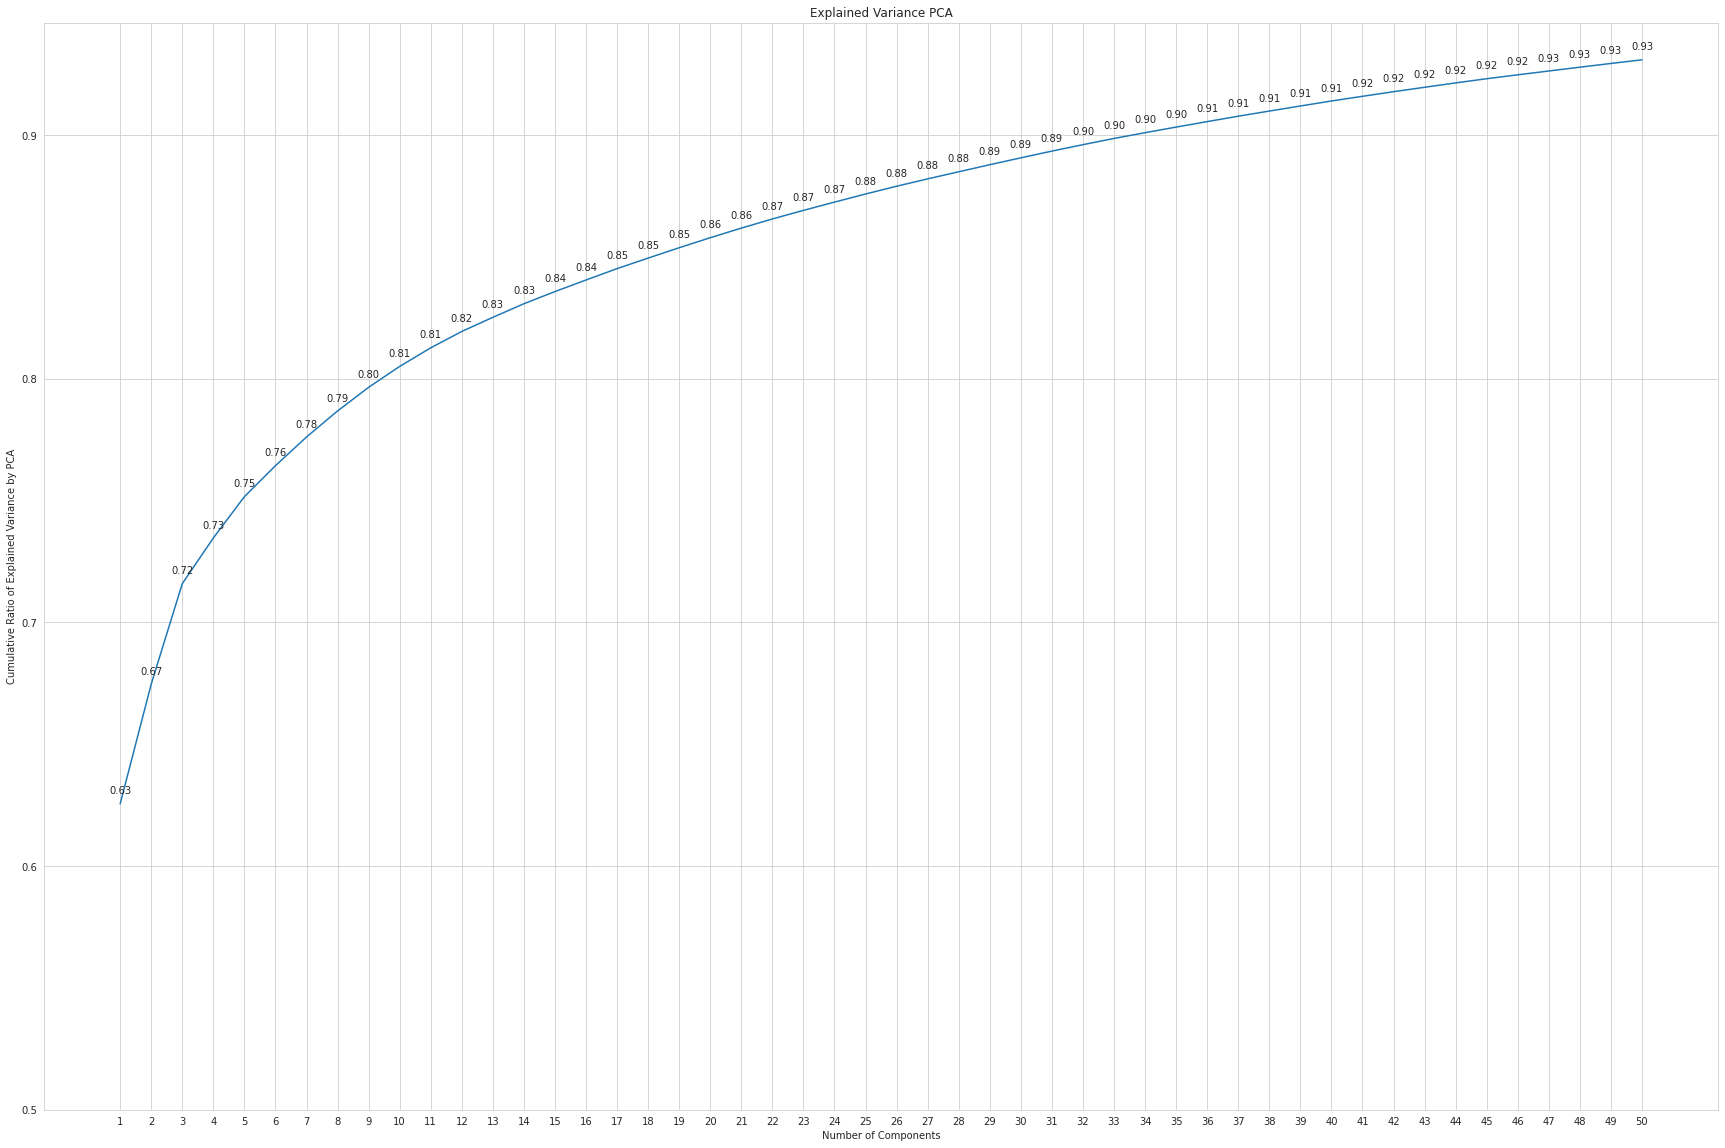

In [ ]:
xp = np.arange(1, 51, 1)
yp = np.cumsum(model_pca.explained_variance_ratio_)

def plot_explained_variance_ratio(x_val, y_val):
  plt.figure(figsize = (30, 20))
  plt.plot(x_val, y_val)
  sns.set_style("whitegrid")
  for x_lab, y_lab in zip(x_val, y_val):
    label = "{:.2f}".format(y_lab)
    plt.annotate(label, (x_lab, y_lab), textcoords = "offset points", xytext = (0, 10), ha = 'center')
  plt.xticks(x_val)
  plt.yticks(np.arange(0.5, 1.0, 0.1))
  plt.title("Explained Variance PCA")
  plt.xlabel("Number of Components")
  plt.ylabel("Cumulative Ratio of Explained Variance by PCA")
  plt.show()

plot_explained_variance_ratio(x_val = xp, y_val = yp)

As we see from the 2D and 3D plots of reduced dimensionality, we obeserve that the data points are too tightly clustered together. However, it can be seen that all the "static" activities are clustered together (Standing, Sitting, and Laying) while the "active" activities are clustered tightly (Walking, Walking downstairs, Walking upstairs) due to the fact that they are similar in nature.

In order too visualize the scatter plot clearly by reducing dimensionality and not loosing too much original information, we can visualize the data with t-SNE that finds patterns based on similarity of data points with multiple features. 

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


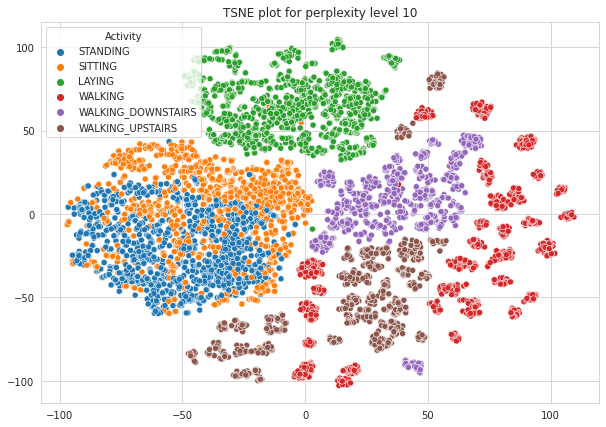

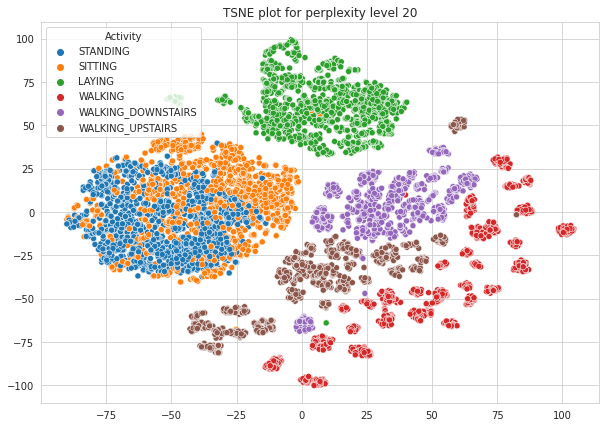

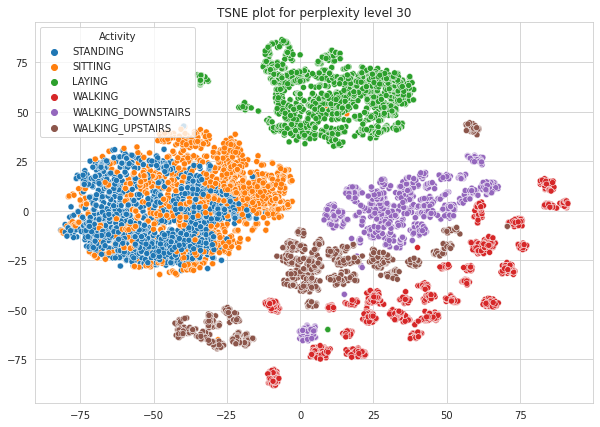

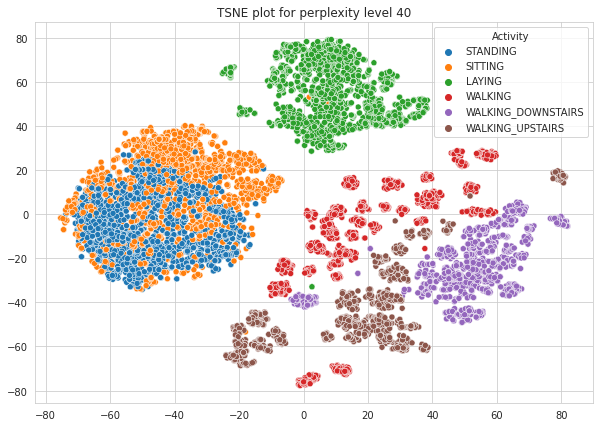

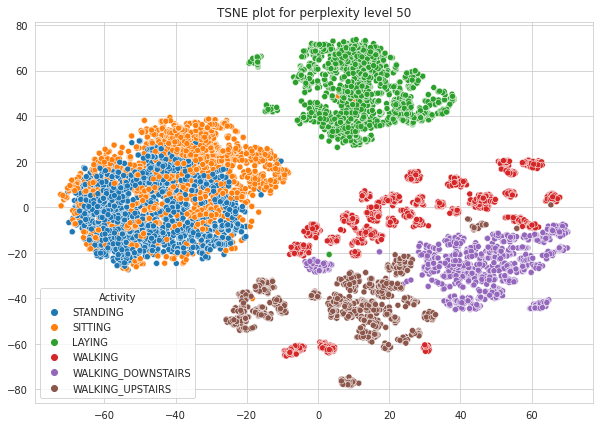

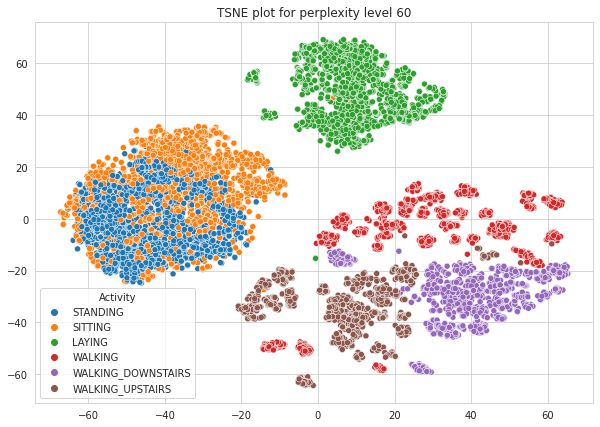

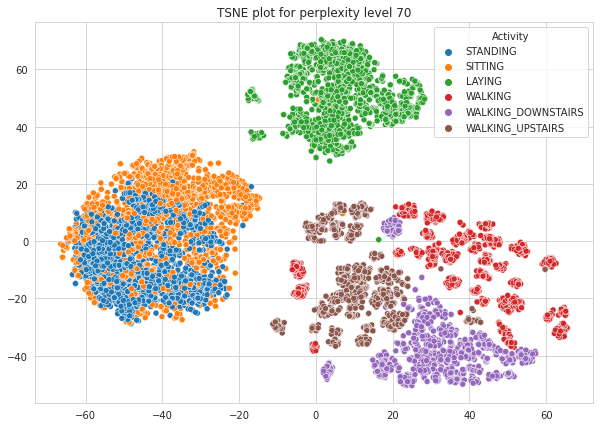

In [ ]:
from sklearn.manifold import TSNE
import time

perplexity_levels = [10, 20, 30, 40, 50, 60, 70]
for i in perplexity_levels:
  %time
  model_tsne = TSNE(n_components = 2, perplexity = i, random_state = 42)
  fitted_model_tsne = model_tsne.fit_transform(matrix_for_reduction)
  plt.figure(figsize = (10, 7))
  sns.scatterplot(x = fitted_model_tsne[:, 0], y = fitted_model_tsne[:, 1], hue = df_train["Activity"])
  plt.title("TSNE plot for perplexity level " + str(i))

From the seven t-SNE plots with different perplexity levels, we can easily see that the higher the perplexity, the clearer the shapes of each clusters are displayed. We can identify that "Laying" activity has its own cluster, which means that the data pertaining to the activity is very distinct from the rest of the activities. We can also identify that "Standing" and "Sitting" are tightly clustered together, and the three walking activities are somewhat close to one another. 

# **Data Preprocessing**

We separate the categories (classes) from the actual numerical data used for training.

In [ ]:
y_train = df_train.Activity
X_train = df_train.drop(['subject', 'Activity'], axis = 1)

y_test = df_test.Activity
X_test = df_test.drop(['subject', 'Activity'], axis = 1)

# **Feature Selection**

In [ ]:
# Make a random forest classifier on the X_train (n_estimators = 500, random_state = 42)
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

selection_classifier = RandomForestClassifier(n_estimators = 500, criterion = 'gini', random_state = 42)
selection_classifier.fit(X_train, y_train)

# uncomment to view ranked importance scores for each 561 features
# importances = selection_classifier.feature_importances_ # Gini importance with respect to the features' order

# indices = np.argsort(importances)[::-1] # sort from largest to smallest

# for x in range(X_train.shape[1]):
#  print("%2d) %-*s %f" % (x + 1, 40, X_train.columns[indices[x]], importances[indices[x]]))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
# refactored to allow threshold value flexibility

def similar(list1, list2):
  return list1 == list2

def select_feature(threshold_val):
  sfm = SelectFromModel(estimator = selection_classifier, threshold = threshold_val, prefit = True)
  X_train_filtered = sfm.transform(X_train)
  X_test_filtered = sfm.transform(X_test)

  train_filtered_features = []
  test_filtered_features = []
  
  for feats in sfm.get_support(indices = True):
    train_filtered_features.append(X_train.columns[feats])
  for feats in sfm.get_support(indices = True):
    test_filtered_features.append(X_test.columns[feats])

  # condition check just in case
  if (similar(train_filtered_features, test_filtered_features)):
    return X_train_filtered, X_test_filtered
  else:
    raise Exception('different feature between train and test set')

# **Modeling**

*   K-Nearest Neighbors
*   Multinomial Logistic Regression (using softmax activation function)
*   Decision Tree Classifier
*   Support Vector Machine (Linear and Kernel)

All of these machine learning models are implemented using Python's scikit-learn API, with hyperparameters tuned. The best parameter combination will be selected with either GridSearchCV or RandomizedSearchCV function, where the best combination is chosen based on the highest mean cross-validation score on the training dataset. Each of the classifiers have three different threshold values used for feature selection, then the accuracy scores generated with different threshold values are then compared and the best score for the classifier is kept in a data structure.

RandomizedSearchCV is selected when the list of hyperparameters is huge, and thus, creating a large number of possible combinations of hyperparameters (RandomizedSearchCV selects random combinations, so it does not test all hyperparameters). GridSearchCV can be used on models with smaller number of hyperarameters to be tuned (GridSearchCV runs on all possible combinations of hyperparameters, and so its time complexity increases with higher number of hyperparameters).

In [ ]:
from sklearn.model_selection import RandomizedSearchCV # used to select the best hyperparameter stochastically
from sklearn.model_selection import GridSearchCV # runs on all combinations of hyperparameters
from sklearn.metrics import accuracy_score
# maintain a dictionary to record the classifier with its best score: GLOBAL VAR!
res_dict = {}
# used for feature selection based on threshold values: GLOBAL CONST LIST!
threshold_values = ['median', 0.001, 'mean']

In [ ]:
# refactored methods and utils
def search_cvs(search_method, train_data, test_data, t):
  search_method.fit(train_data, y_train)
  y_pred = search_method.predict(test_data)
  score = accuracy_score(y_true = y_test, y_pred = y_pred)
  
  dict_res_obj = {
    "Best estimator": search_method.best_estimator_,
    "Best parameters": search_method.best_params_,
    "Best score": search_method.best_score_, # this is the mean cross validation score for the best estimator
    "Feature selection threshold " + str(t) + " accuracy score": score
  }

  return dict_res_obj, score

def grid_search_and_ret(classifier, train_data, test_data, threshold_str, params):
  dict_res_obj, score = search_cvs(GridSearchCV(classifier, param_grid = params, cv = 5), train_data, test_data, threshold_str)
  return dict_res_obj, score

def random_search_and_ret(classifier, train_data, test_data, threshold_str, params):
  dict_res_obj, score = search_cvs(RandomizedSearchCV(classifier, param_distributions = params, cv = 5, random_state = 42), train_data, test_data, threshold_str)
  return dict_res_obj, score
  
def put_to_res_dict(method, score_list):
  res_dict.update({method: max(score_list)})

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# 91.516% accurate

param_grid_1 = dict(n_neighbors = list(range(2, 16))) # parameter used in KNN for validation

"""
Takes in hyperparameters in the form of
a dictionary. List of hyperparameters can be referenced from 
sklearn API website.
Returns a list of dictionary with values of the best estimator
and best mean cross-validation and accuracy score of the best best 
estimator for each threshold values for feature selection. 

"""
def KNN(parameter = param_grid_1):
  result_dict_list = [] # placeholder for results dictionary
  score_list = [] # placeholder for the accuracy scores of the three threshold values
  for t in threshold_values:
    X_imp_train, X_imp_test = select_feature(t)
    if len(parameter) > 3:
      result_scores, score = random_search_and_ret(KNeighborsClassifier(), X_imp_train, X_imp_test, t, params = parameter)
    else:
      result_scores, score = grid_search_and_ret(KNeighborsClassifier(), X_imp_train, X_imp_test, t, params = parameter)
    score_list.append(score)
    result_dict_list.append(result_scores)
  put_to_res_dict("KNN", score_list)
  return result_dict_list
    
####Make function call####
KNN()

[{'Best estimator': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                       weights='uniform'),
  'Best parameters': {'n_neighbors': 11},
  'Best score': 0.909280465415262,
  'Feature selection threshold median accuracy score': 0.9151679674244995},
 {'Best estimator': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                       weights='uniform'),
  'Best parameters': {'n_neighbors': 12},
  'Best score': 0.9062866206985853,
  'Feature selection threshold 0.001 accuracy score': 0.9015948422124194},
 {'Best estimator': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                       weights='uniform'),
  'Best parameters': {'n_neighbors': 13},
  'Best score

In [ ]:
from sklearn.linear_model import LogisticRegression

# check how this works with softmax https://towardsdatascience.com/ml-from-scratch-multinomial-logistic-regression-6dda9cbacf9d
# regularization tutorial https://www.datacamp.com/community/tutorials/towards-preventing-overfitting-regularization

param_grid_2 = dict(penalty = ['l1', 'l2', 'none'], C = np.arange(5, 71, 5), 
                    multi_class = ['auto', 'multinomial'], fit_intercept = [True, False])

"""
Takes in hyperparameters in the form of
a dictionary. List of hyperparameters can be referenced from 
sklearn API website.
Returns a list of dictionary with values of the best estimator
and best mean cross-validation and accuracy score of the best best 
estimator for each threshold values for feature selection. 

"""
def LogReg(parameter = param_grid_2):
  result_dict_list = []
  score_list = []
  for t in threshold_values:
    X_imp_train, X_imp_test = select_feature(t)

    warnings.filterwarnings('ignore') # ignore all warnings and exceptions listed
    
    if len(parameter) > 3:
      result_scores, score = random_search_and_ret(LogisticRegression(), X_imp_train, X_imp_test, t, params = parameter)
    else:
      result_scores, score = grid_search_and_ret(LogisticRegression(), X_imp_train, X_imp_test, t, params = parameter)
    score_list.append(score)
    result_dict_list.append(result_scores)
  put_to_res_dict("Logistic Regression", score_list)
  return result_dict_list

####Make function call####
LogReg()

[{'Best estimator': LogisticRegression(C=60, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='multinomial', n_jobs=None, penalty='none',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False),
  'Best parameters': {'C': 60,
   'fit_intercept': True,
   'multi_class': 'multinomial',
   'penalty': 'none'},
  'Best score': 0.9254717740257217,
  'Feature selection threshold median accuracy score': 0.9487614523243977},
 {'Best estimator': LogisticRegression(C=60, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='multinomial', n_jobs=None, penalty='none',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False),
  'Best parameters': {'C': 60,
   'fit_intercept'

In [ ]:
from sklearn.tree import DecisionTreeClassifier # = 84.66%

# info see here: https://towardsdatascience.com/machine-learning-basics-descision-tree-from-scratch-part-ii-dee664d46831
# on criterions: https://towardsdatascience.com/machine-learning-basics-descision-tree-from-scratch-part-i-4251bfa1b45c
param_grid_3 = dict(criterion = ['entropy', 'gini'], splitter = ['best', 'random'], max_depth = list(np.arange(3, 20, 2)))

"""
Takes in hyperparameters in the form of
a dictionary. List of hyperparameters can be referenced from 
sklearn API website.
Returns a list of dictionary with values of the best estimator
and best mean cross-validation and accuracy score of the best best 
estimator for each threshold values for feature selection. 

"""
def DecisionTree(parameter = param_grid_3):
  result_dict_list = []
  score_list = []
  for t in threshold_values:
    X_imp_train, X_imp_test = select_feature(t)
    if len(parameter) > 3:
      result_scores, score = random_search_and_ret(DecisionTreeClassifier(random_state = 42), X_imp_train, X_imp_test, t, params = parameter)
    else:
      result_scores, score = grid_search_and_ret(DecisionTreeClassifier(random_state = 42), X_imp_train, X_imp_test, t, params = parameter)
    score_list.append(score)
    result_dict_list.append(result_scores)
  put_to_res_dict("Decision Tree Classifier", score_list)
  return result_dict_list

####Make function call####
DecisionTree()

[{'Best estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                         max_depth=13, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=42, splitter='random'),
  'Best parameters': {'criterion': 'entropy',
   'max_depth': 13,
   'splitter': 'random'},
  'Best score': 0.8707855732367726,
  'Feature selection threshold median accuracy score': 0.829996606718697},
 {'Best estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                         max_depth=7, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                   

In [ ]:
from sklearn.svm import LinearSVC # 96.369% accurate

# check this resource: https://scikit-learn.org/stable/modules/svm.html#complexity

param_grid_4 = dict(loss = ['hinge', 'squared_hinge'], C = np.arange(0.5, 5, 0.5))

""" 
For now, we are training on the LinearSVC with maximizing the support vector margins and summing up the squared hinge loss
with their respective penalty (C) values for L2-regularization. Dual and Primal optimization problems can be surveyed later.

In LinearSVM, the primal problem is formulated with the sum of the max of hinge loss as the penalty.
SVM is formulates the sum of slack variables for each data point as the pernalty. 

When classified correctly, slack = 0, else, slack can be measured as the distance that the data point exceeds the margin (never negative). 
Regularization term (C) is used to control the strength of the penalty. When C is large, then this means the cost of having a penalty is large,
so we tend to tighten the margin. When C is small, then this means that the cost of having a penalty is small, thus, enlarging the size of 
the margin. 

"""

def LinearSVM(parameter = param_grid_4):
  result_dict_list = []
  score_list = []
  for t in threshold_values:
    X_imp_train, X_imp_test = select_feature(t)
    if len(parameter) > 3:
      result_scores, score = random_search_and_ret(LinearSVC(penalty = 'l2', random_state = 42, dual = False), X_imp_train, X_imp_test, t, params = parameter)
    else:
      result_scores, score = grid_search_and_ret(LinearSVC(penalty = 'l2', random_state = 42, dual = False), X_imp_train, X_imp_test, t, params = parameter)
    score_list.append(score)
    result_dict_list.append(result_scores)
  put_to_res_dict("Linear SVM", score_list)
  return result_dict_list

####Make function call####
LinearSVM()

[{'Best estimator': LinearSVC(C=0.5, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, loss='squared_hinge', max_iter=1000,
            multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
            verbose=0),
  'Best parameters': {'C': 0.5, 'loss': 'squared_hinge'},
  'Best score': 0.9328163080323904,
  'Feature selection threshold median accuracy score': 0.9636918900576857},
 {'Best estimator': LinearSVC(C=0.5, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, loss='squared_hinge', max_iter=1000,
            multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
            verbose=0),
  'Best parameters': {'C': 0.5, 'loss': 'squared_hinge'},
  'Best score': 0.9300956820525628,
  'Feature selection threshold 0.001 accuracy score': 0.9558873430607397},
 {'Best estimator': LinearSVC(C=0.5, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, loss='squared_hinge', max_it

In [41]:
from sklearn.svm import SVC # 95.69% accurate, randomized search based from rbf with C = 4.5, and gamma = scale

# check out on OVR or OVO methods: https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/#:~:text=One%2Dvs%2Drest%20(OvR%20for%20short%2C%20also%20referred,algorithms%20for%20multi%2Dclass%20classification.&text=A%20binary%20classifier%20is%20then,that%20is%20the%20most%20confident.

# cache_size can be defined the the users themselves
param_grid_5 = dict(C = np.arange(0.5, 5, 0.5), kernel = ['poly', 'rbf'], 
                    gamma = ['scale', 'auto'], cache_size = [200, 300, 400, 500, 600, 700]) 
                    
def KernelSVM(parameter = param_grid_5):
  result_dict_list = []
  score_list = []
  for t in threshold_values:
    X_imp_train, X_imp_test = select_feature(t)
    if len(parameter) > 3:
      result_scores, score = random_search_and_ret(SVC(random_state = 42, decision_function_shape = 'ovo'), X_imp_train, X_imp_test, t, params = parameter)
    else:
      result_scores, score = grid_search_and_ret(SVC(random_state = 42, decision_function_shape = 'ovo'), X_imp_train, X_imp_test, t, params = parameter)
    score_list.append(score)
    result_dict_list.append(result_scores)
  put_to_res_dict("Kernel SVM", score_list)
  return result_dict_list


####Make function call####
KernelSVM()

[{'Best estimator': SVC(C=4.5, break_ties=False, cache_size=400, class_weight=None, coef0=0.0,
      decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
      verbose=False),
  'Best parameters': {'C': 4.5,
   'cache_size': 400,
   'gamma': 'scale',
   'kernel': 'rbf'},
  'Best score': 0.939343313124026,
  'Feature selection threshold median accuracy score': 0.9569053274516457},
 {'Best estimator': SVC(C=4.5, break_ties=False, cache_size=400, class_weight=None, coef0=0.0,
      decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
      verbose=False),
  'Best parameters': {'C': 4.5,
   'cache_size': 400,
   'gamma': 'scale',
   'kernel': 'rbf'},
  'Best score': 0.9329495877208803,
  'Feature selection threshold 0.001 accuracy score': 0.9487614523243977},
 {'Best estimator': SVC(C=4.5, break

In [51]:
# view the classifier and accuracy scores
res_dict

{'Bagging classifier with DecisionTreeClassifier': 0.9073634204275535,
 'Bagging classifier with LogisticRegression': 0.9484221241940957,
 'Decision Tree Classifier': 0.8466236851034951,
 'KNN': 0.9151679674244995,
 'Kernel SVM': 0.9569053274516457,
 'Linear SVM': 0.9636918900576857,
 'Logistic Regression': 0.9487614523243977}

# **Ensemble Methods**



*   Bagging
*   Boosting
*   Stacking







Interestingly, the decision tree doesn't work expected; it has the lowest accuracy score. This weak learner can in fact, be combined and trained together on the dataset, which may possibly give a higher accuracy score. One such method is using ensemble techniques. 

For the boosting algorithm, AdaBoost and Gradient Boosting are used in this project. The differences in the algorithm will be discussed below. 

Again, this will be implemented via Python's built-in scikit-learn API.

In [50]:
from sklearn.ensemble import BaggingClassifier

param_grid_6 = dict(n_estimators = np.arange(5, 20, 5), max_samples = (0.5, 1))

# By default, must be sampling with replacement
# By deafult, obtain the hyperparameters of the DecisionTree that gives the best accuracy above
# KNN does not work on boostrap sampling of the bagging classifier
def Bagging(estimator = DecisionTreeClassifier(criterion = 'entropy', max_depth = 11, splitter = 'best', random_state = 42), parameter = param_grid_6):
  result_dict_list = []
  score_list = []
  
  if estimator.__class__.__name__ == KNeighborsClassifier:
    raise Exception("KNN not valid for bootstrap bagging classifier.")
  
  for t in threshold_values:
    X_imp_train, X_imp_test = select_feature(t)
    if len(parameter) > 3:
      result_scores, score = random_search_and_ret(BaggingClassifier(base_estimator = estimator, random_state = 42, bootstrap = True), X_imp_train, X_imp_test, t, params = parameter)
    else:
      result_scores, score = grid_search_and_ret(BaggingClassifier(base_estimator = estimator, random_state = 42, bootstrap = True), X_imp_train, X_imp_test, t, params = parameter)
    score_list.append(score)
    result_dict_list.append(result_scores)
  put_to_res_dict("Bagging classifier with " + estimator.__class__.__name__, score_list)
  return result_dict_list

####Make function call####
# Bagging(estimator = LogisticRegression(C = 60, fit_intercept = True, multi_class = 'multinomial', penalty = 'none')) # classifiers may vary
Bagging()

[{'Best estimator': BaggingClassifier(base_estimator=LogisticRegression(C=60, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None, max_iter=100,
                                                      multi_class='multinomial',
                                                      n_jobs=None, penalty='none',
                                                      random_state=None,
                                                      solver='lbfgs', tol=0.0001,
                                                      verbose=0,
                                                      warm_start=False),
                    bootstrap=True, bootstrap_features=False, max_features=1.0,
                    max_samples=0.5, n_estimators=15, n_jobs=None,
 

In [ ]:
# util methods here

In [ ]:
def adaBoost():
  pass



In [ ]:
def gradientBoost():
  pass

In [ ]:


def Stacking():
  pass